In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
root_dir = "/content/drive/My Drive/Hack In India/"
base_dir = root_dir + 'fastai-v3/'

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
path = Path("/content/drive/My Drive/pulmonary-chest-xray/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/")

In [5]:
fnames = get_image_files(path)
fnames[:5]

[PosixPath('/content/drive/My Drive/pulmonary-chest-xray/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0208_0.png'),
 PosixPath('/content/drive/My Drive/pulmonary-chest-xray/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0205_0.png'),
 PosixPath('/content/drive/My Drive/pulmonary-chest-xray/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0209_0.png'),
 PosixPath('/content/drive/My Drive/pulmonary-chest-xray/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0206_0.png'),
 PosixPath('/content/drive/My Drive/pulmonary-chest-xray/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0207_0.png')]

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
bs = 64

In [8]:
def get_labels(file_path): return 'Normal' if '_0.png' in str(file_path) else 'Abnormal'
data = ImageDataBunch.from_name_func(path, fnames, label_func=get_labels, ds_tfms=get_transforms(), size = 224, bs=bs).normalize(imagenet_stats)

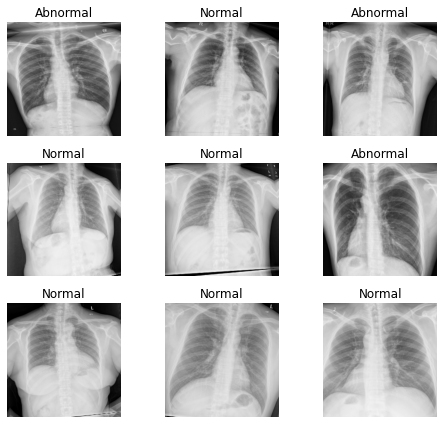

In [9]:
data.show_batch(rows=3, figsize=(7,6))

In [10]:
data.c,len(data.train_ds), len(data.valid_ds)

(2, 530, 132)

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [12]:
learn.save('stage-1')

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

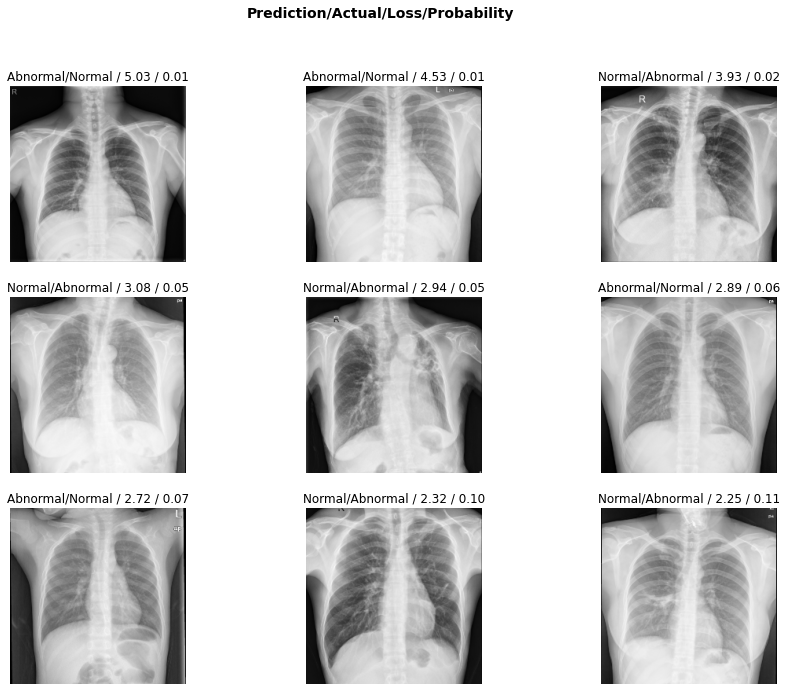

In [14]:
interp.plot_top_losses(9, figsize=(15,11))

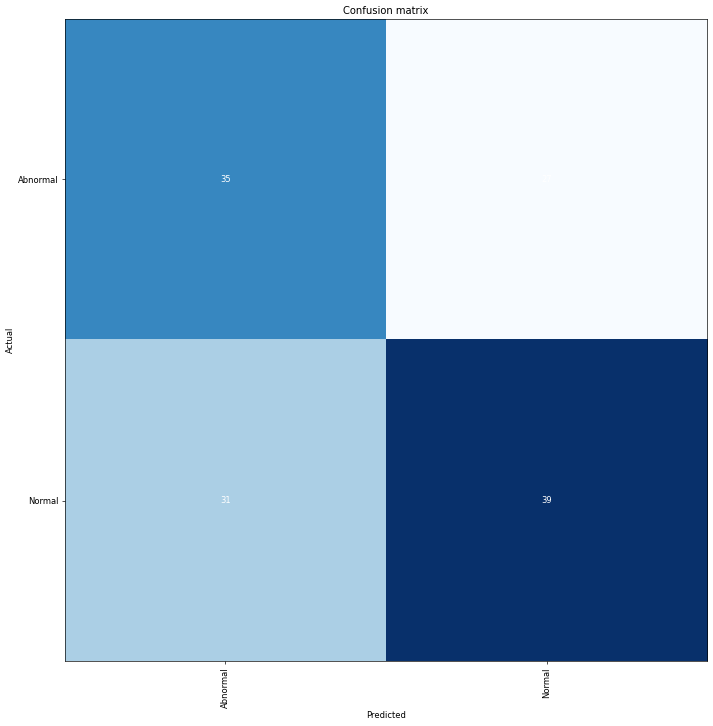

In [15]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [16]:
learn.unfreeze()

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


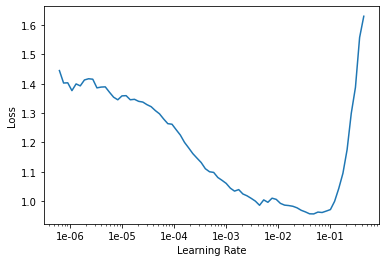

In [18]:
learn.recorder.plot()

In [19]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.246759,1.032451,0.378788,01:54
1,1.004766,1.525236,0.393939,01:55
2,0.895212,1.195160,0.371212,01:56
3,0.826709,0.825417,0.265152,01:58
4,0.754290,0.783458,0.250000,01:56


In [20]:
learn.save('stage-2', return_path=True)

PosixPath('/content/drive/My Drive/pulmonary-chest-xray/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/models/stage-2.pth')

In [21]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.544967,0.715614,0.234848,01:55
1,0.529306,0.597196,0.204545,01:54
2,0.519610,0.546710,0.234848,01:54
3,0.499234,0.654762,0.174242,01:56
4,0.461855,0.573215,0.196970,01:54
5,0.440952,0.498696,0.196970,01:53
6,0.408149,0.521842,0.159091,01:53
7,0.393840,0.533830,0.174242,01:54
8,0.357901,0.553278,0.166667,01:53
9,0.340681,0.560809,0.174242,01:58


In [22]:
learn.save('final-stage-resnet34', return_path=True)

PosixPath('/content/drive/My Drive/pulmonary-chest-xray/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/models/final-stage-resnet34.pth')

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


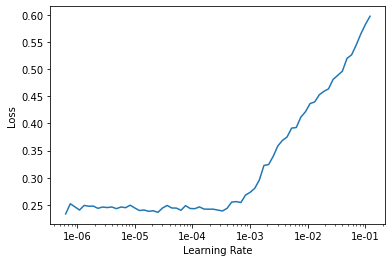

In [24]:
learn.recorder.plot()

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

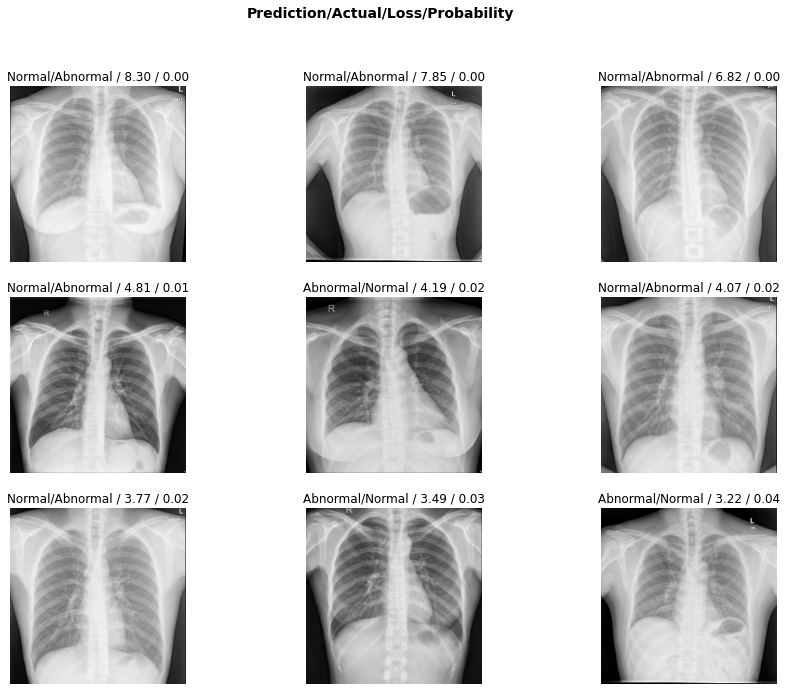

In [26]:
interp.plot_top_losses(9, figsize=(15,11))

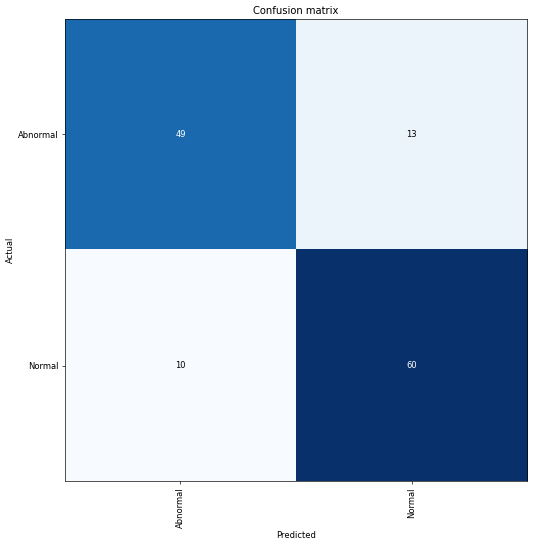

In [27]:
interp.plot_confusion_matrix(figsize=(9,9), dpi=60)

AttributeError: ignored

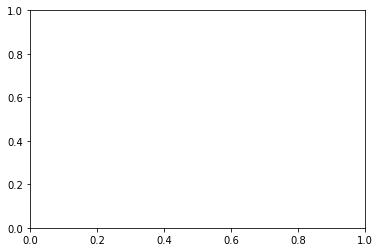

In [29]:
learn.recorder.plot_losses()

In [ ]:
learn.recorder.plot_metrics()

In [35]:
learn.export(file="model.pkl")

In [36]:
path=learn.path
print(path)

/content/drive/My Drive/pulmonary-chest-xray/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png


In [32]:
import os

In [34]:
os.chdir('/content/drive/My Drive/Hack In India')